<a href="https://colab.research.google.com/github/haviet12/Date_4_AI/blob/main/con_lac_nguoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=2c0fb02591eb9bddabd28fe907a3905a87425f2645896159d4c75b107adeeacb
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import *

In [5]:
alpha=np.linspace(-pi/2,pi/2,61)
der=np.linspace(-pi/4,pi/4,61)
force=np.linspace(-150,150,61)
## tao cac bien dau vao
force =ctrl.Consequent( force,"force")
alpha =ctrl.Antecedent(alpha,"alpha")
der= ctrl.Antecedent(der,"der")


# ## Force
# force["LN"]= fuzz.gaussmf(a,-150,25 )
# # LN = fuzz.gaussmf(x,-150,25) ## gaussmf(x,a,c)
# force["N"]= fuzz.gaussmf(a,-75,25)
# force["AV"] = fuzz.gaussmf(a,0,3)
# force["P"]= fuzz.gaussmf(a,75,25)
# force["LP"]= fuzz.gaussmf(a,150,25)
# force.view()
# ## Alpha
# alpha["LN"]=fuzz.gaussmf(b,-pi/2,pi/10)
# alpha["N"]=fuzz.gaussmf(b,-pi/4,pi/10)
# alpha["AV"]=fuzz.gaussmf(b,0,pi/128)
# alpha["P"]=fuzz.gaussmf(b,pi/4,pi/10)
# alpha["LP"]=fuzz.gaussmf(b,pi/2,pi/10)
# alpha.view()

# ## Der
# der["LN"]=fuzz.gaussmf(c,-pi/4,pi/20)
# der["N"]=fuzz.gaussmf(c,-pi/8,pi/20)
# der["AV"]=fuzz.gaussmf(c,0,pi/128)
# der["P"]=fuzz.gaussmf(c,pi/8,pi/20)
# der["LP"]=fuzz.gaussmf(c,pi/4,pi/20)
# der.view()


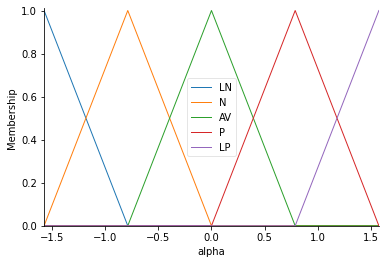

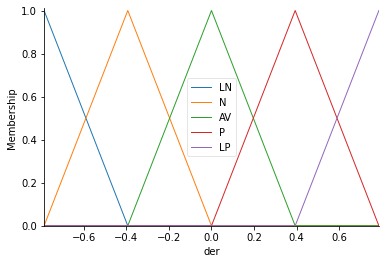

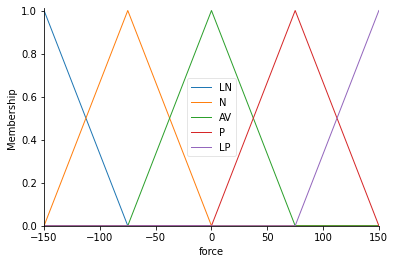

In [8]:
evaluate =['LN','N','AV','P','LP']
alpha.automf(names=evaluate)
der.automf(names=evaluate)
force.automf(names=evaluate)

alpha.view()
der.view()
force.view()

In [9]:
rule_1= ctrl.Rule(antecedent=(alpha['LN']&der['P'])|(alpha['LN']&der['LP'])|(alpha['N']&der['P'])|(alpha['N']&der['LP']),consequent=force['LN'],label="Large Negative")
rule_2= ctrl.Rule(antecedent=(alpha['LN']&der['LN'])|(alpha['LN']&der['N'])|(alpha['LN']&der['AV'])|(alpha['N']&der['LN'])|(alpha["N"]&der["AV"]),consequent=force['N'],label="Negative")
rule_3= ctrl.Rule(antecedent=(alpha['N']&der['N'])|(alpha['AV']&der['LN'])|(alpha['AV']&der['N'])|(alpha['AV']&der['AV'])|(alpha['AV']&der['P'])|(alpha['AV']&der['LP'])|(alpha['P']&der['LN']),consequent=force['AV'],label="Average")
rule_4= ctrl.Rule(antecedent=(alpha['P']&der['N'])|(alpha['P']&der['AV'])|(alpha['LP']&der['LN'])|(alpha['LP']&der['N']),consequent=force['P'],label="Positive")
rule_5= ctrl.Rule(antecedent=(alpha['P']&der['P'])|(alpha['P']&der['LP'])|(alpha['LP']&der['AV'])|(alpha['LP']&der['P'])|(alpha['LP']&der['LP']),consequent=force['LP'],label="Large Positive")


In [13]:
sys= ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5])
sim=ctrl.ControlSystemSimulation(sys,flush_after_run=100*100)
upsample=np.linspace(0,10,61)
x,y=np.meshgrid(upsample,upsample)
z=np.zeros_like(x)

In [16]:
for i in range (2):
  for j in range(2):
    sim.input['alpha']=x[i,j]
    sim.input['der']=y[i,j]
    sim.compute
    z[i,j]=sim.output['force']

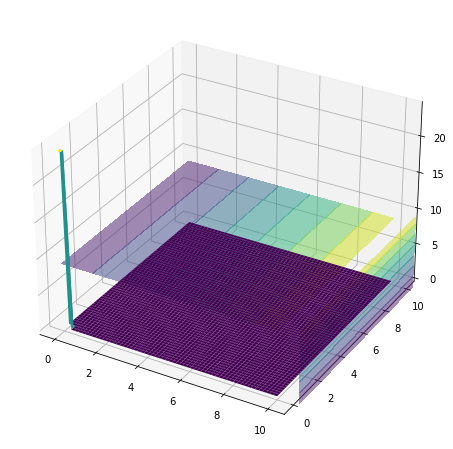

In [17]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
suf=ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis', linewidth=0.4,antialiased=True)
cset=ax.contourf(x,y,x,zdir='z', offset=9,cmap='viridis', alpha=0.5)
cset=ax.contourf(x,y,x,zdir='y', offset=11,cmap='viridis', alpha=0.5)
cset=ax.contourf(x,y,x,zdir='x', offset=11,cmap='viridis', alpha=0.5)